# GPT-4 Vision

GPT-4 Turbo with Vision is a large multimodal model (LMM) developed by OpenAI that can analyze images and provide textual responses to questions about them. It incorporates both natural language processing and visual understanding.

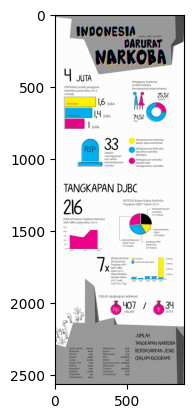

In [1]:
# Show data/ingredients.png image below
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('data/infografis.jpg')
plt.imshow(img)
plt.show()

In [3]:
import requests
import base64

# Configuration
IMAGE_PATH = "./data/infografis.jpg"
encoded_image = base64.b64encode(open(IMAGE_PATH, 'rb').read()).decode('ascii')

In [1]:
import os
import json
from openai import AzureOpenAI
import time
from IPython.display import clear_output
from datetime import datetime, timedelta
import pandas as pd
from dotenv import load_dotenv

load_dotenv('../config/environment_variables.env')

client = AzureOpenAI(
  azure_endpoint = os.environ.get("AZURE_OPENAI_ENDPOINT_TEXT"), 
  api_key=os.environ.get("AZURE_OPENAI_KEY_TEXT"),  
  api_version=os.environ.get("AZURE_OPENAI_API_VERSION")
)

In [4]:
response = client.chat.completions.create(
    model=os.environ.get("AZURE_OPENAI_GPT4V_DEPLOYMENT"),
    messages=[
        { "role": "system", "content": "Kamu adalah assistant untuk membaca infografis." },
        { "role": "user", "content": [  
            { 
                "type": "text", 
                "text": "Berikan poin-poin informasi apa saja yang terdapat dari infografis berikut." 
            },
            { 
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpg;base64,{encoded_image}"
                }
            }
        ] }
    ],
    max_tokens=4096
)
print(response)

ChatCompletion(id='chatcmpl-96IuY8ZIhqRN4vKz0JLF43EHkhqW7', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Infografis tersebut memberikan informasi mengenai keadaan darurat narkoba di Indonesia dengan sumber data dari DJBC dan BNN. Poin-poin informasinya adalah:\n\n- Estimasi jumlah pengguna narkotika di Indonesia pada tahun 2014 adalah 4 juta orang, dengan rincian:\n  - Coba pakai: 1,6 juta orang\n  - Teratur pakai: 1,4 juta orang\n  - Pecandu: 1 juta orang\n- Pengguna narkoba di Indonesia berdasarkan jenis kelamin:\n  - Wanita: 25,5%\n  - Pria: 74,5%\n- 33 orang meninggal setiap hari akibat penyalahgunaan narkoba dengan penyebab seperti:\n  - Mengonsumsi narkotika dalam dosis berlebihan\n  - Mengonsumsi lebih dari satu jenis narkotika sekaligus\n  - Menggunaan narkotika setelah tidak menggunakannya\n- DJBC mencatat jumlah kasus tegahan narkoba pada tahun 2014 yaitu 216 kasus.\n- Modus yang digunakan dalam kasus-kasus tegahan narko

In [5]:
print(response.choices[0].message.content)

Infografis tersebut memberikan informasi mengenai keadaan darurat narkoba di Indonesia dengan sumber data dari DJBC dan BNN. Poin-poin informasinya adalah:

- Estimasi jumlah pengguna narkotika di Indonesia pada tahun 2014 adalah 4 juta orang, dengan rincian:
  - Coba pakai: 1,6 juta orang
  - Teratur pakai: 1,4 juta orang
  - Pecandu: 1 juta orang
- Pengguna narkoba di Indonesia berdasarkan jenis kelamin:
  - Wanita: 25,5%
  - Pria: 74,5%
- 33 orang meninggal setiap hari akibat penyalahgunaan narkoba dengan penyebab seperti:
  - Mengonsumsi narkotika dalam dosis berlebihan
  - Mengonsumsi lebih dari satu jenis narkotika sekaligus
  - Menggunaan narkotika setelah tidak menggunakannya
- DJBC mencatat jumlah kasus tegahan narkoba pada tahun 2014 yaitu 216 kasus.
- Modus yang digunakan dalam kasus-kasus tegahan narkoba oleh DJBC tahun 2014:
  - Barang bawaan/hand carry: 57 kasus
  - Penyembunyian di badan: 47 kasus
  - Kompartemen palsu: 29 kasus
  - Kontainer/PTJT/Paket Pos: 50 kasus
- P